In [1]:
source('K2methods.r') |> suppressPackageStartupMessages()
library(bnstruct)     |> suppressPackageStartupMessages()

Warning message:
"il pacchetto 'bnlearn' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'bnstruct' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'igraph' è stato creato con R versione 4.2.3"


In [2]:
M = matrix(data = 
           c(1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 
             0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 
             0, 1, 1, 1, 0, 1, 1, 0, 1, 0), 
            ncol = 3, nrow = 10,
            byrow = FALSE)
mode(M) = 'integer'
colnames(M) = c('x1', 'x2', 'x3')

DF = BNDataset(data = M, 
        discreteness = rep('d',3), 
        variables = c('x1', 'x2', 'x3'), 
        node.sizes = c(2, 2, 2), 
        starts.from = 0)
DF


Dataset: 

num.variables 3

variables
x1 x2 x3
discreteness
TRUE TRUE TRUE
node.sizes
2 2 2
num.items
10
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

In [3]:
net = learn.network(DF, scoring.func = "BIC", layering = c(1,2,3)) 

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



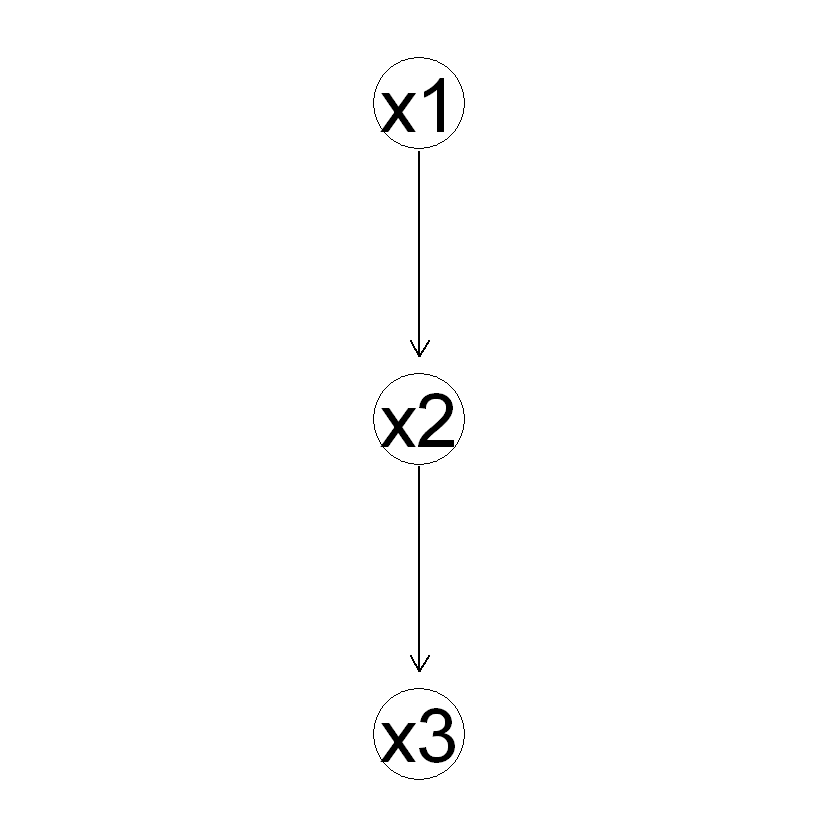

In [4]:
plot(net)

In [5]:
net = learn.network(DF, scoring.func = "BIC") 

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



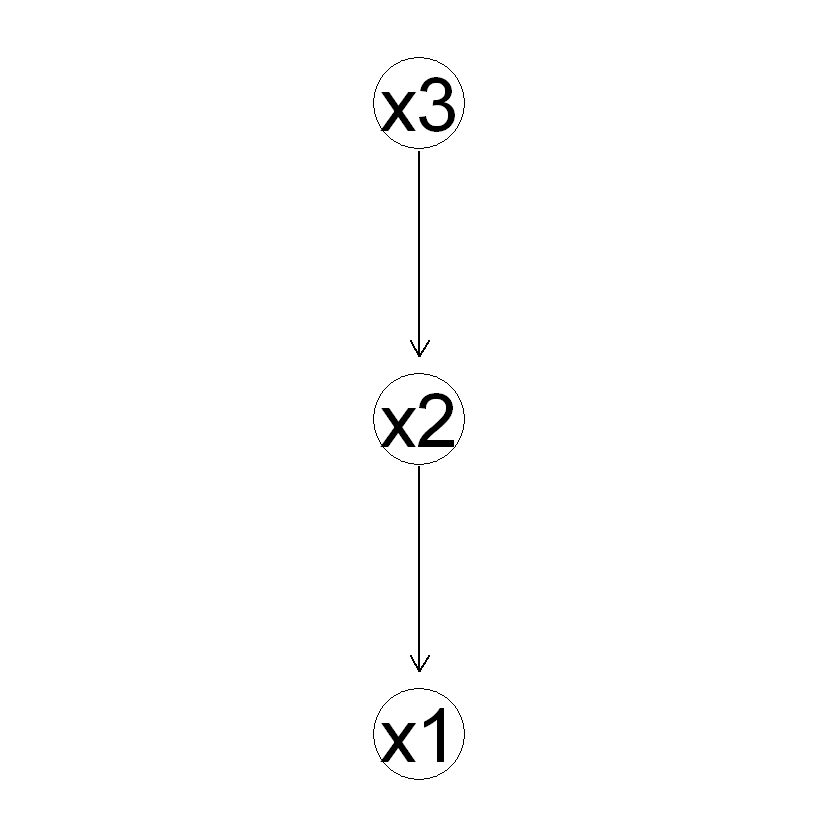

In [6]:
plot(net)

# If one looks at the score results, the two networks lead to the very same score!!

In [7]:
net_bnl = empty.graph(colnames(M))
amat(net_bnl) = dag(net)

In [8]:
mode(M) = 'character'
score(net_bnl, data = as.data.frame(M, stringsAsFactors = TRUE), type = 'bic') # using DF is the same

[1] -20.19397